# **Tarea 1**
## Aspectos básicos de grafos y algo de redes aleatorias

- **Fecha de entrega!** viernes 24 de septiembre
- **Modalidad!** Jupyter Notebook!

1. Modelo $G_{n,p}$. En el modelo **Erdős-Rényi**, cada par de nodos se une a través de una arista con una probabilidad $p$. Considere un conjunto de nodos $V$ de tamaño $n=100$. Considere 100 valores para $p$ entre 0 y 1. 

- Implemente el modelo $G_{n,p}$. 
- Dibuje grafos para diferentes valores del parámetro $p$ (3-5 ejemplos).
- Calcule el **número de componentes conexas** en función de $p$.
- Calcule el **tamaño de la componente conexa más grande** en función de $p$. 
- Calcule el **camino mínimo promedio de la componente conexa más grande** en función de $p$.
- Calcule la **densidad** en función de $p$.
- Calcule el **coeficiente de clustering promedio** en función de $p$.
- Concluya de forma simple y precisa.

In [ ]:
#Importar librerias
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli #Fue considerada como una alternativa para construir la función grafo
import random #Fue considerada como una alternativa para construir la función graf
import pickle
% matplotlib inline

- Implemente el modelo $G_{n,p}$. 

A continuación, se presenta la función propuesta para crear un grafo de n nodos, utilizando un probabilidad p

In [ ]:
def grafo(n,p):
  G = nx.Graph()  #crear grafo
  G.add_nodes_from(range(n)) #agregar N nodos
  for nodo1 in G.nodes(): #Elegir nodo 1
    for nodo2 in G.nodes(): #Elegir nodo 2
      if nodo1 < nodo2 and p>random.uniform(0, 1): #Asegurar que los dos nodos no se repiten y p>random
        G.add_edge(nodo1,nodo2) #Agregar arco entre nodos

  return G

- Dibuje grafos para diferentes valores del parámetro $p$ (3-5 ejemplos).

**GRAFO 1:** $n$=100 y $p$=0,01

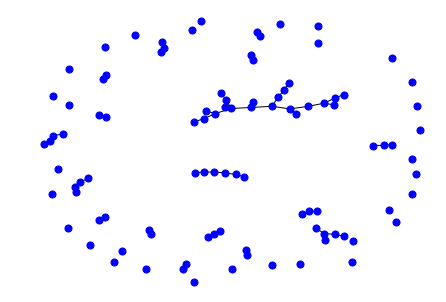

In [ ]:
grafo1=grafo(n=100,p=0.01)
nx.draw(grafo1,node_size=50,node_color="blue")

In [ ]:
nx.number_connected_components(grafo1)

49

**GRAFO 2:** $n$=100 y $p$=0,1

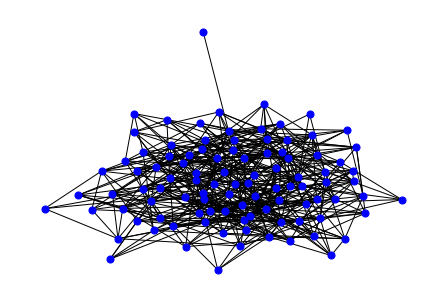

In [ ]:
grafo2=grafo(n=100,p=0.1)
nx.draw(grafo2,node_size=50,node_color="blue")

**GRAFO 3:** $n$=100 y $p$=0,5

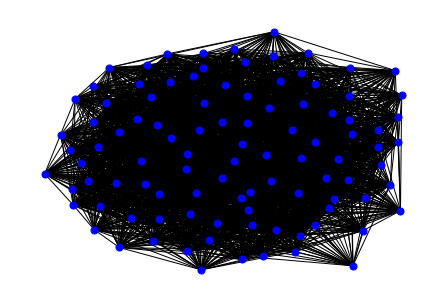

In [ ]:
grafo3=grafo(n=100,p=0.5)
nx.draw(grafo3,node_size=50,node_color="blue")

A continuación, se presentan los valores que permiten caracterizar los 95 grafos. Estos grafos fueron realizados considerando probabilidades que van desde 0,05 hasta 1, con un incremento de 0,01.

In [ ]:
prob=np.arange(0.05,1,0.01)
numb_comp=[]
diam=[]
avg_short=[]
density=[]
avg_cluster=[]
for p in prob:
  graph=grafo(100,p)
  numb_comp.append(nx.number_connected_components(graph))
  diam.append(nx.diameter(graph))
  avg_short.append(nx.average_shortest_path_length(graph))
  density.append(nx.density(graph))
  avg_cluster.append(nx.average_clustering(graph))

- Calcule el **número de componentes conexas** en función de $p$.

Considerando el grafo 2, con $n$=100 y $p$=0.1, se tienen las siguiente componentes conexas por nodo:

In [ ]:
nx.number_connected_components(grafo2)

1

Considerando los resultados para los 95 valores $p$ se tiene que:

In [ ]:
numb_comp

- Calcule el **tamaño de la componente conexa más grande** en función de $p$. 


Para el grafo 2 se tiene lo siguiente:

In [ ]:
nx.diameter(grafo2)

4

Para todos los valores de $p$ se tiene que:

In [ ]:
diam

En el siguiente gráfico se muestra la relación entre el diámetro y los valores de $p$:

Text(0, 0.5, 'Diameter')

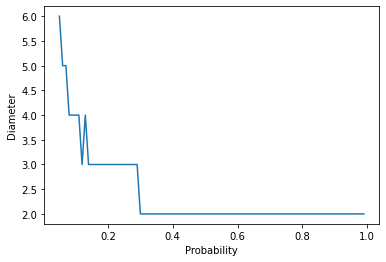

In [ ]:
plt.plot(prob,diam)
plt.xlabel("Probability")
plt.ylabel("Diameter")

- Calcule el **camino mínimo promedio de la componente conexa más grande** en función de $p$.


Para el grafo 2 se tiene lo siguiente:

In [ ]:
nx.average_shortest_path_length(grafo2)

2.2426262626262625

Para los distintos valores de p se tiene que:

In [ ]:
avg_short

En el siguiente gráfico se puede ver la relación entre el camino mínimo promedio y las probabilidades $p$ 

Text(0, 0.5, 'Average shortest path length')

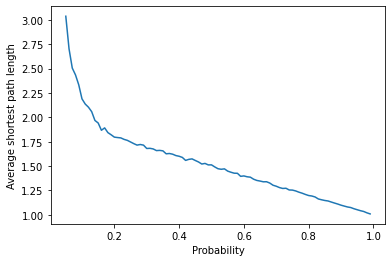

In [ ]:
plt.plot(prob,avg_short)
plt.xlabel("Probability")
plt.ylabel("Average shortest path length")

- Calcule la **densidad** en función de $p$.


Función de densidad del número de componentes conexos para el grafo 2

In [ ]:
nx.density(grafo2)

0.1

Para los distintos valores de $p$ se tiene que:
 

In [ ]:
density

En el siguiente gráfico se puede ver la relación entre densidad y probabilidad

Text(0, 0.5, 'Density')

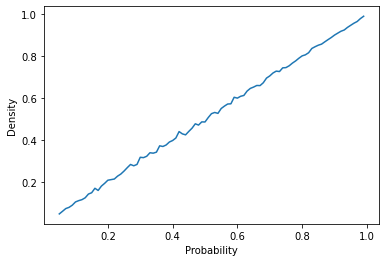

In [ ]:
plt.plot(prob,density)
plt.xlabel("Probability")
plt.ylabel("Density")

- Calcule el **coeficiente de clustering promedio** en función de $p$.


El coeficiente de clustering promedio del grafo 2 viene dado por: 

In [ ]:
nx.average_clustering(grafo2)

0.09855670636552986

Para los distintos valores de $p$ se tiene que:

In [ ]:
avg_cluster

En el siguiente gráfico se puede observar la relación entre el coeficiente de clustering promedio y las probabilidades elegidas

Text(0, 0.5, 'Average clustering')

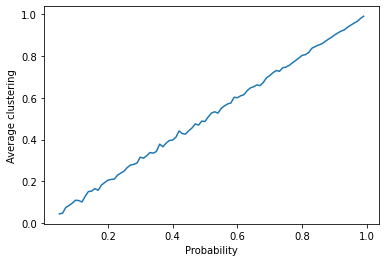

In [ ]:
plt.plot(prob,avg_cluster)
plt.xlabel("Probability")
plt.ylabel("Average clustering")

- Concluya de forma simple y precisa.

Respecto a la probabilidad utilizada para construir los grafos, se puede afirmar que su magnitud va a condicionar significativamente las conexiones entre los nodos. A medida que los valores tienden a 1, el número de nodos conectados aumenta. Por otro lado, cuando los valores son muy cercanos a 0, se puede observar un mayor número de componentes conexos (como el grafo 1 presentado en ejemplos).

Considerando las distintas medidas calculadas, se puede notar que, el camino más corto tiende a disminuir cuando la probabilidad aumenta. Este comportamiento es contrario a lo que ocurre con la densidad y el coeficiente de clustering promedio. A medida que la probabilidad aumenta, ambos valores tienden a aumentar.

2. Un **grafo real!** El archivo "knn-graph-south-america.p" contiene en formato pickle (pueden usar "pickle.load(open('knn-graph-south-america.p','rb'))" para abrirlo) un grafo, que llamaremos $G_{SA}$, construido de la siguiente forma:

- A partir de datos [tipológicos](https://sails.clld.org), obtuvimos información acerca de 88 lenguas de Sudamérica. Cada lengua es representada por 9 rasgos. 
- Con una famosa definición de [distancia](https://en.wikipedia.org/wiki/Hamming_distance), determinamos los $k$-vecinos cercanos de cada lengua. Fijamos $k=5$.
- Con esto, cada lengua se conecta con las $k$ lenguas más cercanas.

Realice los siguientes cálculos:

- Construya 100 grafos $G_{n,p}$, con $n$ igual al número de nodos de $G_{SA}$, y distintos valores de $p$.
- ¿Qué valor de $p$ entrega el grafo aleatorio que más se asemeja a $G_{SA}$? Elija dos medidas de las usadas en la pregunta 1. 
- Concluya de forma simple y precisa.

In [ ]:
#Cargar archivo
data=pickle.load(open('knn-graph-south-america.p','rb'))

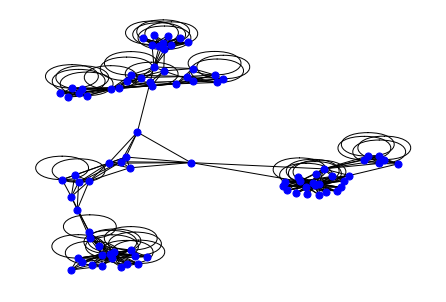

In [ ]:
#Ver data
nx.draw(data,node_size=50,node_color="blue")

In [ ]:
#Número de nodos
len(data)

88

A continuación, se calculan las medidas asociadas al grafo presentado anteriormente: 

In [ ]:
print("El número de componentes es:",nx.number_connected_components(data))
print("El tamaño de la componente conexa más grande es:",nx.diameter(data))
print("El camino mínimo promedio es:",nx.average_shortest_path_length(data))
print("La densidad es:",nx.density(data))
print("El coeficiente de clustering promedio es:",nx.average_clustering(data))


El número de componentes es: 1
El tamaño de la componente conexa más grande es: 10
El camino mínimo promedio es: 5.018808777429467
La densidad es: 0.09535005224660396
El coeficiente de clustering promedio es: 0.7277791420434961


- Construya 100 grafos $G_{n,p}$, con $n$ igual al número de nodos de $G_{SA}$, y distintos valores de $p$.

Para realizar la comparación, se construyen 95 grafos (al igual que en la pregunta 1) con $n$=88

In [ ]:
prob2=np.arange(0.05,1,0.01)
numb_comp2=[]
avg_short2=[]
density2=[]
avg_cluster2=[]
for p in prob2:
  graph=grafo(88,p) #Considerar 88 nodos por grafo
  numb_comp2.append(nx.number_connected_components(graph))
  avg_short2.append(nx.average_shortest_path_length(graph))
  density2.append(nx.density(graph))
  avg_cluster2.append(nx.average_clustering(graph))

In [ ]:
#Concatenar resultados
Resumen=pd.concat([pd.DataFrame(prob2),pd.DataFrame(numb_comp2),pd.DataFrame(avg_short2),
           pd.DataFrame(density2),pd.DataFrame(avg_cluster2)],axis=1)

#Cambiar nombre columnas
names=["Prob","Numb_comp","Avg_short","Density","Avg_cluster"]
Resumen.columns=names

- ¿Qué valor de $p$ entrega el grafo aleatorio que más se asemeja a $G_{SA}$? Elija dos medidas de las usadas en la pregunta 1. 

Para determinar esto, se analizarán las medidas **Camino mínimo promedio (Avg_short)**, **Densidad (Density)** y **Coeficiente de clustering promedio (Avg_cluster)**.

In [ ]:
Resumen.iloc[0:10]

,Prob,Numb_comp,Avg_short,Density,Avg_cluster
0,0.05,1,3.091954,0.051202,0.031911
1,0.06,1,2.865465,0.060606,0.062365
2,0.07,1,2.593521,0.073668,0.072793
3,0.08,1,2.485893,0.080460,0.084279
4,0.09,1,2.389237,0.088819,0.099599
5,0.10,1,2.301202,0.098224,0.101596
6,0.11,1,2.190961,0.111546,0.119236
7,0.12,1,2.128527,0.120951,0.128088
8,0.13,1,2.073145,0.130094,0.149791
9,0.14,1,2.002351,0.141066,0.139079


In [ ]:
Resumen.iloc[60:80]

,Prob,Numb_comp,Avg_short,Density,Avg_cluster
60,0.65,1,1.356322,0.643678,0.646609
61,0.66,1,1.335162,0.664838,0.665214
62,0.67,1,1.324713,0.675287,0.675709
63,0.68,1,1.328892,0.671108,0.673783
64,0.69,1,1.299896,0.700104,0.700543
65,0.70,1,1.305381,0.694619,0.693796
66,0.71,1,1.292842,0.707158,0.707815
67,0.72,1,1.271421,0.728579,0.726784
68,0.73,1,1.274556,0.725444,0.722969
69,0.74,1,1.248433,0.751567,0.750417


Considerando el **camino mínimo promedio**, la probabilidad $p$=0,05 arroja el resultado más cercano.

Si se considera la medida **densidad**, las probabilidades que permiten la mejor aproximación son $p$=0,09 y $p$=0,1.

Por último, si tomamos como referencia la medida **coeficiente de clustering promedio**, la probabilidad que permite la mejor aproximación es $p$=0,73.

- Concluya de forma simple y precisa.

Considerando los valores de p de las tres medidas, se puede afirmar que para probabilidades entre 0,05 y 0,1 se logran resultados similares a los del grafo propuesto en el enunciado. Esto se sostiene en las medidas **camino mínimo promedio** y **densidad**. No obstante, para la medida **coeficiente de clustering promedio** se obtiene un resultado similar considerando un valor de $p$=0,73.